In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("Wine.csv")
ds

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


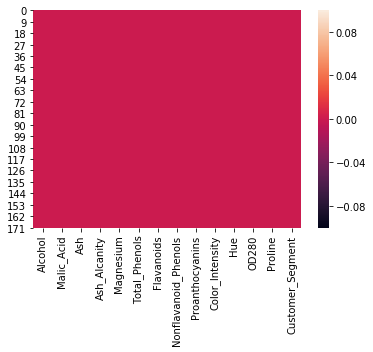

In [101]:
sns.heatmap(ds.isna())

# Clustering

In [31]:
from sklearn.cluster import DBSCAN
X=ds[ds.columns[0:-1]]
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [37]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X = stscaler.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [38]:
data=X

In [42]:
dbsc = DBSCAN(eps = 0.1, min_samples=40).fit(data)
labels = dbsc.labels_
set(labels)

{-1}

# KMeans

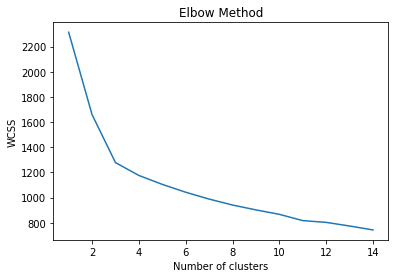

In [46]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
maxCluster = 15
for i in range(1,maxCluster):
    kmeans = KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,maxCluster),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [48]:
# Fitting K-Means Clustering to teh dataset
kmeans = KMeans(n_clusters=3,init="k-means++", random_state=42)
y_predict  = kmeans.fit_predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [80]:
ds[ds.columns[-1]].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

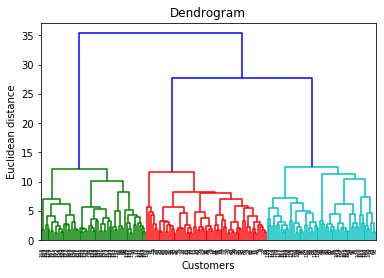

In [66]:
# using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

# KNN

In [67]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters= 3, affinity= 'euclidean', linkage= 'ward')
y_hc=hc.fit_predict(X)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Visualisation

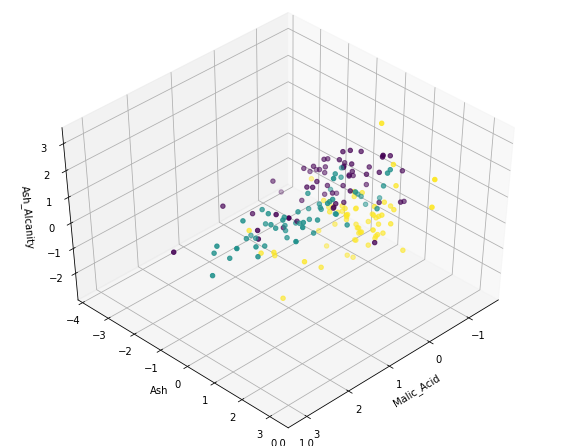

In [104]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
plt.cla()
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
#ax.scatter(normalised_X[:,2],normalised_X[:,3],normalised_X[:,4],c=y_hc.astype(Float))
#for i in range (0,X.shape[1]-3):
i=1
ax = Axes3D(fig,rect=[0,0,0.95,1],elev=45,azim=45)
plt.cla()
ax.set_xlabel(ds.columns[i])
ax.set_ylabel(ds.columns[1+i])
ax.set_zlabel(ds.columns[2+i])
ax.scatter(X[:,i],X[:,i+1],X[:,i+2],c=y_hc.astype(float))

# Using PCA

In [3]:
dataset=ds

In [4]:
# Split dataset X (Independent) & Y (Dependent)
X = dataset[dataset.columns[0:13]].values # Independent Variable [ strt:end columns which are independent ]
Y = dataset[dataset.columns[13:14]].values # Dependent Variable [column which is dependent]

In [5]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
stsc= StandardScaler()
X = stsc.fit_transform(X)

In [6]:
# Divide dataset  into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 , random_state=0)

In [ ]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
stsc= StandardScaler()
X = stsc.fit_transform(X)

# Principal Component Analysis (PCA)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) # n_components : no. of columns to use
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36722576, 0.19231879])

In [31]:
X_train

array([[-2.21627675, -0.99947455],
       [-1.76925781,  1.61300784],
       [ 1.17230703,  2.17064305],
       [-2.6014977 , -1.609546  ],
       [ 1.86604905,  0.25746789],
       [ 2.49349602, -1.37197296],
       [ 0.99055658,  2.21283977],
       [-0.31170514,  2.33942943],
       [-0.27666207,  2.28546079],
       [ 2.14355466, -1.13229538],
       [-3.01518615, -0.22042782],
       [ 1.97545232,  1.23483092],
       [-2.14836544, -0.97737265],
       [ 2.11177177, -2.38185703],
       [-2.27974752, -0.17171001],
       [-3.02367296, -0.22662921],
       [ 2.61693584, -0.96025772],
       [-1.19962285, -3.60637471],
       [ 2.63283998, -0.01968345],
       [ 0.29070953,  2.22881352],
       [-2.7250823 , -2.59097738],
       [-2.54768702, -0.38218125],
       [ 1.78508956,  0.84083107],
       [-2.80389949, -0.34883473],
       [-2.88844587, -1.8830148 ],
       [ 1.33095558,  0.05053056],
       [-2.45255261,  0.14391294],
       [-2.28093414,  0.52369861],
       [ 1.26560815,

# Logistic Regression

In [32]:
# fitting logistic regression to the training dataset
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# predicting the test results
Y_predict = logr.predict(X_test)
Y_predict

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [34]:
# Calculate the R squared value
from sklearn.metrics import r2_score
r2_score(Y_test,logr.predict(X_test))

0.9451219512195121

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,logr.predict(X_test))

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


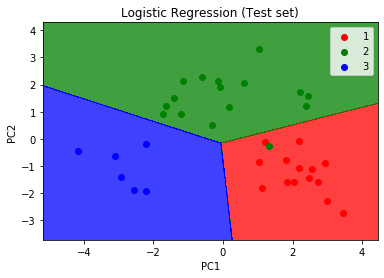

In [46]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test.reshape(-1)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [48]:
Y_test.reshape(-1)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [49]:
Y_predict

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

# Linear Discriminant Analysis (LDA)

In [62]:
# Divide dataset  into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 , random_state=0)

In [63]:
# Appling LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train,Y_train)
# difference between PCA is here you have to pass Y_train also as supervised Learning
X_test = lda.transform(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# fitting logistic regression to the training dataset
from sklearn.linear_model import LogisticRegression
logr1 = LogisticRegression(random_state=0)
logr1.fit(X_train,Y_train)
Y_predict = logr1.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [65]:
# Calculate the R squared value
from sklearn.metrics import r2_score
r2_score(Y_test,logr1.predict(X_test))

1.0

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,logr1.predict(X_test))

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


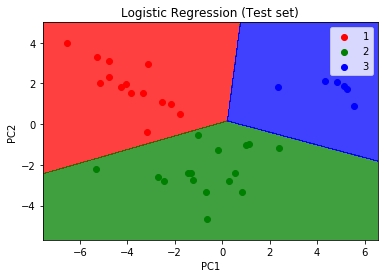

In [68]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test.reshape(-1)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logr1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


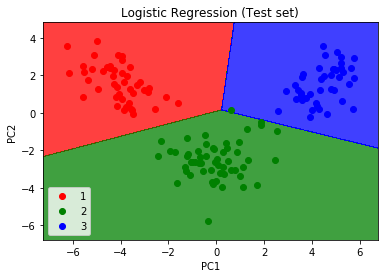

In [69]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train.reshape(-1)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logr1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Kernel PCA

In [111]:
# Divide dataset  into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 , random_state=0)

In [12]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components= 2) # n_components : no. of columns to use
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
X_train

array([[-2.21627675, -0.99947455],
       [-1.76925781,  1.61300784],
       [ 1.17230703,  2.17064305],
       [-2.6014977 , -1.609546  ],
       [ 1.86604905,  0.25746789],
       [ 2.49349602, -1.37197296],
       [ 0.99055658,  2.21283977],
       [-0.31170514,  2.33942943],
       [-0.27666207,  2.28546079],
       [ 2.14355466, -1.13229538],
       [-3.01518615, -0.22042782],
       [ 1.97545232,  1.23483092],
       [-2.14836544, -0.97737265],
       [ 2.11177177, -2.38185703],
       [-2.27974752, -0.17171001],
       [-3.02367296, -0.22662921],
       [ 2.61693584, -0.96025772],
       [-1.19962285, -3.60637471],
       [ 2.63283998, -0.01968345],
       [ 0.29070953,  2.22881352],
       [-2.7250823 , -2.59097738],
       [-2.54768702, -0.38218125],
       [ 1.78508956,  0.84083107],
       [-2.80389949, -0.34883473],
       [-2.88844587, -1.8830148 ],
       [ 1.33095558,  0.05053056],
       [-2.45255261,  0.14391294],
       [-2.28093414,  0.52369861],
       [ 1.26560815,

In [13]:
# fitting logistic regression to the training dataset
from sklearn.linear_model import LogisticRegression
logr2 = LogisticRegression(random_state=0)
logr2.fit(X_train,Y_train)
Y_predict = logr2.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
# Calculate the R squared value
from sklearn.metrics import r2_score
r2_score(Y_test,logr2.predict(X_test))

0.9451219512195121

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,logr2.predict(X_test))

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


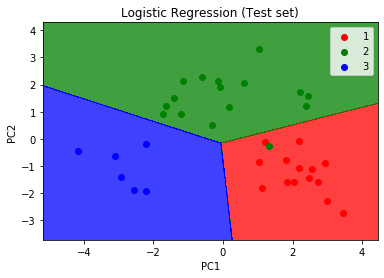

In [11]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test.reshape(-1)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logr2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()